#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 213230013, 213230007 .
4. Write your names here: Rohan Appaso More, Mirza Aman Baig.
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**



#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Normalize function 

Add your code in the cell below to normalize the independent variables, making them zero mean and unit variance.

In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    X_normalise = (X-np.mean(X,axis=0))/(np.std(X,axis=0)) #Normalising the data such that it has zero mean and unit variance
    return X_normalise

#     raise NotImplementedError()

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    n,m = X.shape  #storing number of rows and columns of X in n and m correspondingly.
    X0 = np.ones((n,1)) # creating a vector of ones.
    Xnew = np.hstack((X,X0))  #Now finally we can concatenate the X0 vector 
    y = np.matmul(Xnew,w)   # our prediction function is y which is y = Xnew*w
    return y
# #   
    #raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [6]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    n,m = X.shape 
    X0 = np.ones((n,1))
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w)

    mse = (np.square(t-y)).mean() #using the standard formula of mse
    return mse
        
 
    raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    n,m = X.shape 
    X0 = np.ones((n,1))
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w)

    k2 = np.absolute((t-y)) #using the standard formula of MAE
    mae = k2.mean()
    return mae
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda=0): # Output should be a single number
    ''' Need to specify what inputs are'''
    n,m = X.shape 
    X0 = np.ones((n,1))
    l = 0.5  # l is lambda
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w)
    term1 = (np.square(t-y)).mean() #this is mse which is first term of L2
    p = w.shape 
    q = p[0]  
    
    wnew = np.delete(w,q-1)  #dropping the bias
    sqr_wnew = np.square(wnew)
    sum_sqr_wnew = np.sum(sqr_wnew) #using norm for second term
    term2 = l*(np.sqrt(sum_sqr_wnew))
    final = term1+term2
    return final
    
    # YOUR CODE HERE
    
    #raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    p = w.shape
    q = p[0]
    wnew = np.delete(w,q-1)
    term2 = lamda*(np.sum(np.absolute(wnew)))  #for second term of L1 using standard formula
    final = MSE_Loss (X, t, w, lamda =0) + term2
    return final
    # YOUR CODE HERE
    raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Loss (X, t, w): # Output should be a single number
    numr = np.sqrt(MSE_Loss (X, t, w, lamda =0)) #calling the mse function defined above and taking its square root to get RMSE
    denr = t.std() 
    nrmse = numr/denr     #NRMSE_Loss = RMSE/standard deviation of t. where t is the actual value of output.
    return nrmse
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Loss(X,t,w),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [16]:
def MSE_Gradient (X, t, w, lamda=0):
    n,m = X.shape 
    X0 = np.ones((n,1))
    l = 0.5 #l is lambda
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w) #y is predicted value of output.
    errr = t-y
    final_mse_gr = -1*(np.matmul(errr,Xnew)) #using mse gradient formula
    return final_mse_gr
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    n,m = X.shape 
    X0 = np.ones((n,1))
    l = 0.5  # l is lambda
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w)
    i1 = np.sign(t-y)  #using sign function to assign sign to error
    i2 = -0.5*(np.matmul(i1,Xnew))  #using the formula of MAE Gradient
    return i2
    # YOUR CODE HERE
    raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    n,m = X.shape 
    X0 = np.ones((n,1))
    l = 0.5  # l is lambda
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w)
    error = t-y
    fin_mse_gr = -1*(np.matmul(error,Xnew)) #calulating mse gradient which is the first term of L2_gradient
    p = w.size
    w1 = w
    w1[p-1] = 0
    norm_w = np.sqrt(np.sum(np.square(w1))) # taking norm which is second term.
    tr2 = (lamda/norm_w)*w1
    fnl5 = fin_mse_gr + tr2 #Now adding two terms to get the L2 Gradient.
    return fnl5
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    n,m = X.shape 
    X0 = np.ones((n,1))
    l = 0.5   #l is lambda
    Xnew = np.hstack((X,X0))
    y = np.matmul(Xnew,w)  #predicted value of output
    error = t-y
    fin_mse_gr = -1*(np.matmul(error,Xnew))  # using formula to calculate mse which first term of L1 gradient.
    w1 = w
    w1[3] = 0  #assigning last column of w to zero to maintain dimensions.
    term2 = l*(np.sign(w1))  #Now multiplying with lambda to the sign of weights
    finnnal = fin_mse_gr + term2   #now adding both terms to get L1 Gradient
    return finnnal
    
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
np.random.seed(2)

X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_array_almost_equal([results[1],results[2]],[697.919,17.512],decimal=3)

NotImplementedError: 

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

In [34]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    f0 = np.array([[1],[1]])
    xnew = np.concatenate([X,f0],axis=1) #making last column of X as 1.
    f = np.matmul((xnew.T),xnew)  #Now multiplying both 
    f1 = f+ lamda* (np.identity(4))  #using formula of pseudo inverse
    f2 = (np.linalg.inv(f1))
    f3 = np.matmul(f2,(xnew.T))
    f5 = np.matmul(f3,t)
    return f5

    # YOUR CODE HERE
    raise NotImplementedError()

In [35]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#Save the code above this as a RollNo1_RollNo2_1.py file after running the test blocks to make sure there are no errors.

#**... Part 1 ends**
Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**


1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file (part 1 and part 2), .py file (part 1 only), and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [36]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
import warnings; warnings.simplefilter('ignore')    #ignoring warnings
from sklearn.linear_model import LinearRegression
import os
import sklearn.linear_model

In [37]:
#Reading csv file using link given in question
df=pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')

In [38]:
#reading top 2 rows of data
df.head(2)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5


In [39]:
#assigning a column to Y variable
Y=np.array(df['Next_Tmax'])
Y.shape

(6082,)

In [40]:
# Assigning columns to X variable
X=np.array(df.loc[:,'Present_Tmax':'Solar radiation'])
X.shape

(6082, 21)

In [41]:
#using test train spilt to split the data in 80:20 ratio
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2)

In [59]:

%matplotlib inline
plt.style.use('ggplot')

In [43]:
X_train_scaled=sklearn.preprocessing.scale(X_train, axis=0, with_mean=True, 
with_std=True, copy=True)

X_test_scaled=sklearn.preprocessing.scale(X_test, axis=0, with_mean=True, 
with_std=True, copy=True)

In [44]:
#printing array and datatype of X_test scaled function
print('Array:', X_test_scaled)
 
print('Datatype:', X_test_scaled.dtype)

Array: [[-1.0347905  -0.12094581 -1.76216419 ... -0.78192553 -0.7239871
  -0.24170994]
 [ 0.51264824  0.08303292 -0.77066387 ... -0.73727469 -0.82693171
  -0.73410999]
 [-0.55336511 -0.08015006  1.22030239 ... -0.82482212 -0.76051343
  -1.2027243 ]
 ...
 [-0.62214017 -0.2025373   0.08527454 ... -0.73727469 -0.82693171
  -0.1927336 ]
 [ 2.26641215  1.59247552 -0.80265305 ... -0.65609953 -0.49976018
  -0.16856594]
 [ 1.13162374  1.3069053  -1.09993484 ... -0.49229484 -0.54940617
  -0.94850878]]
Datatype: float64


In [45]:

# Function that gets prediction from matrix and Weights
def getPred(X,W):
    return(np.matmul(X,W))
# The basic loss, sum over the difference of y-ypred
def Loss(Y,ypred):
    l=(Y-ypred)**2
    return(l.sum())
#The Mean Square Error.
def MSE(X,Y,W):
    return((1/X.shape[0])*Loss(Y,getPred(X,W)))

In [46]:
#This function computes the weights seen in Figure 9.
def GradDesc(X,Y,learnRate=0.01,epochs=2000,reg=0):
    
    global cacheLoss
    cacheLoss=[None]*epochs
    
   # Random Initialization of Weights
    Weights=np.random.rand(X.shape[1])
    
    Weights=np.array(Weights)
    Weights=Weights.reshape(-1,1)
    m=X.shape[0]
    
    for i in range(epochs):
        
        predictions=getPred(X,Weights)
        cacheLoss[i]=Loss(Y,predictions)
        
        Weights[0]=Weights[0]-(1/m)*learnRate*(np.matmul(X[:,0].transpose(),predictions-Y))
        
        for j in range(1,len(Weights)):
            
            Weights[j]=Weights[j]-(1/m)*learnRate*(np.matmul(X[:,j].transpose(),predictions-Y)+sum(np.dot(Weights[j],reg)))
    return(Weights)

In [47]:
# Turn into numpy objects, Y should be a column vector
# X_train_scaled=np.array(X_train_scaled)
y_train=np.array(y_train)
y_train=y_train.reshape(-1,1)
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)

#We need a column of ones to add as a bias term
addBias=np.ones([X_train_scaled.shape[0],1])
X_train_scaled=np.append(addBias,X_train_scaled,axis=1)

In [48]:
addBias=np.ones([X_test_scaled.shape[0],1])
X_test_scaled=np.append(addBias,X_test_scaled,axis=1)

In [49]:
# finding weight using gardient descent
Wlinear=GradDesc(X_train_scaled,y_train)
Wlinear

array([[ 3.02918396e+01],
       [ 4.72563737e-01],
       [ 9.09606480e-02],
       [ 3.02013620e-01],
       [-7.79591123e-02],
       [ 1.71429519e+00],
       [ 3.51534175e-01],
       [-4.03693058e-01],
       [ 2.64005871e-01],
       [-3.13678186e-01],
       [-1.86799614e-01],
       [-1.64616826e-01],
       [-1.97018963e-01],
       [-7.48529229e-02],
       [ 2.10111302e-01],
       [-2.22203383e-02],
       [-3.46605203e-02],
       [-4.75479327e-02],
       [-1.34946160e-01],
       [-2.32034167e-01],
       [ 2.95018712e-01],
       [ 6.06154475e-02]])

In [68]:
X_train, X_Validate, y_train, y_Validate = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
#calling Mse error
MSE(X_test_scaled,y_test,Wlinear)

1.846900262417173

In [70]:
def getRidgeLambda(X,Y):
    
    bestMSE=10e100
    
    lamList=[l*0.05 for l in range(0,300)]

    global ridgeLambda
    
    for l in lamList:
        Wr=GradDesc(X,Y,reg=l)
        if MSE(X_Validate,y_validate,Wr)< bestMSE:
            bestMSE=MSE(X_Validate,y_Validate,Wr)
            ridgeLambda=l
          
    
    return(ridgeLambda)



In [71]:
# Cross Validation to get Lasso Paramaters

def getLassoLambda(X,Y):
    
    bestMSE=10e100
    
    alphaList=[l*0.1 for l in range(1,200)]
    
    for a in alphaList:
        lassoModel=sklearn.linear_model.Lasso(alpha=a,max_iter=5000,fit_intercept=False)
        
        lassoModel.fit(X,Y)
        
        getPred=lassoModel.predict(X_test).reshape(-1,1)
        
        MSE=sum((y_test-getPred)**2)
        if MSE < bestMSE:
            bestMSE=MSE
            lassoLambda=a
    return(lassoLambda)


In [72]:
from sklearn import linear_model
l_min=0.01
l_max=0.2
l_num=10
lambdas=np.linspace(l_min,l_max,l_num)
Rsq_train=np.zeros(l_num)
Rsq_test=np.zeros(l_num)

pred_num=X.shape[1]
coef_a=np.zeros((l_num, pred_num))



for ind, i in enumerate(lambdas):
    lasso_df=linear_model.Lasso(alpha=i).fit(X_train,y_train)
    scores=cross_val_score(lasso_df, X,Y, cv=10, scoring='r2')
    Rsq_train[ind]=lasso_df.score(X_train, y_train)
    Rsq_test[ind]=lasso_df.score(X_test, y_test)

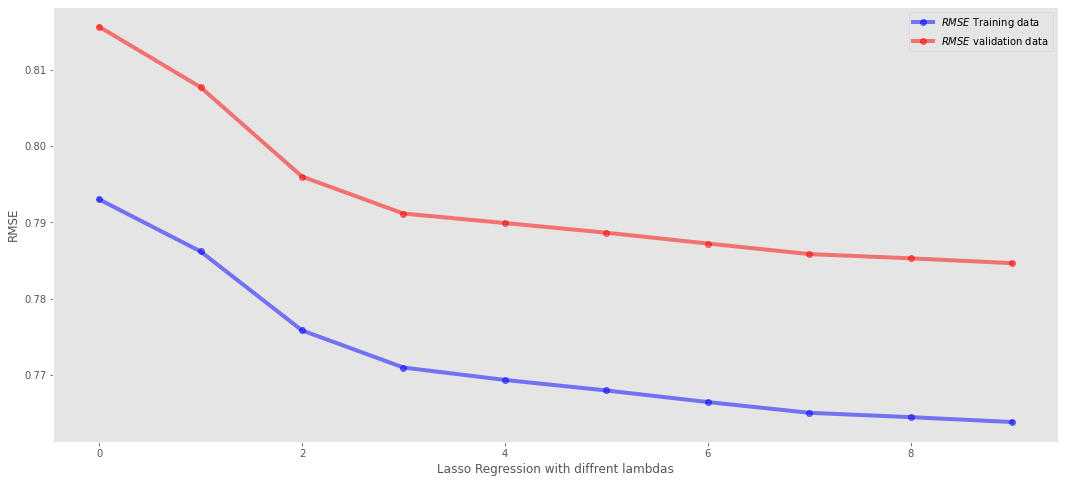

In [73]:
plt.figure(figsize=(18,8))
plt.plot(Rsq_train, 'bo-', label=r'$RMSE$ Training data', color ='blue',alpha=0.5,linewidth=4)
plt.plot(Rsq_test,'bo-',label=r'$RMSE$ validation data', color='red',alpha=0.5,linewidth=4)
plt.ylabel(r'RMSE')
plt.xlabel('Lasso Regression with diffrent lambdas')
plt.legend(loc='best')
plt.grid()

In [74]:
from sklearn import linear_model
l_min=0.01
l_max=0.2
l_num=10
lambdas=np.linspace(l_min,l_max,l_num)


Rsq_train=np.zeros(l_num)
Rsq_test=np.zeros(l_num)

pred_num=X.shape[1]
coef_a=np.zeros((l_num, pred_num))



for ind, i in enumerate(lambdas):
    Ridge_df=linear_model.Ridge(alpha=i).fit(X_train,y_train)
    scores=cross_val_score(Ridge_df, X,Y, cv=10, scoring='r2')
    Rsq_train[ind]=Ridge_df.score(X_train, y_train)
    Rsq_test[ind]=Ridge_df.score(X_test, y_test)
    coef_a[ind,:]=Ridge_df.coef_

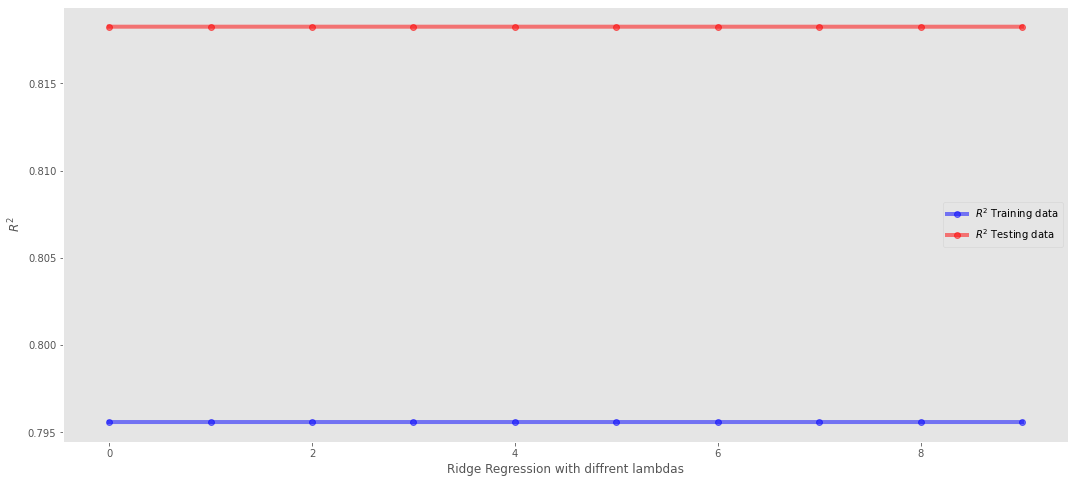

In [75]:
plt.figure(figsize=(18,8))
plt.plot(Rsq_train, 'bo-', label=r'$R^2$ Training data', color ='blue',alpha=0.5,linewidth=4)
plt.plot(Rsq_test,'bo-',label=r'$R^2$ Testing data', color='red',alpha=0.5,linewidth=4)
plt.ylabel(r'$R^2$')
plt.xlabel('Ridge Regression with diffrent lambdas')
plt.legend(loc='best')
plt.grid()

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 